# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



## Business understanding of the problem
The objective is to classify whether a customer will subscribe to a term deposit (y variable: yes/no) based on their characteristics and campaign attributes.
This will help the bank optimize marketing strategies and improve customer targeting.

### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



#### Data task
The task is to identify and quantify the key factors that influence the price of used cars. This involves analyzing the relationships between car attributes (e.g., manufacturer, year, mileage, fuel type, condition) and the target variable, price. The goal is to build a predictive model to estimate car prices based on these features, evaluate the impact of each feature using statistical and machine learning techniques, and provide actionable insights to optimize inventory and pricing strategies for the dealership.



### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [6]:
import pandas as pd

#### 1. Read in the vehicles.csv file.

In [19]:
bank_df = pd.read_csv('data/bank-additional/bank-additional.csv', delimiter=';')

In [21]:
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


#### 2. Investigate the dataset for missing or problematic data



In [24]:
# checking counts and data type for each column
print(bank_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [28]:
# data count
print(bank_df.shape)

(4119, 21)


In [30]:
bank_df.describe(include='all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,4119.000000,4119,4119,4119,4119,4119,4119,4119,4119,4119,...,4119.000000,4119.000000,4119.000000,4119,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,1012,2509,1264,3315,2175,3349,2652,1378,860,...,NaN,NaN,NaN,3523,NaN,NaN,NaN,NaN,NaN,3668
mean,40.113620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.537266,960.422190,0.190337,NaN,0.084972,93.579704,-40.499102,3.621356,5166.481695,NaN
std,10.313362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.568159,191.922786,0.541788,NaN,1.563114,0.579349,4.594578,1.733591,73.667904,NaN
min,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.635000,4963.600000,NaN
25%,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.334000,5099.100000,NaN
50%,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [34]:
# checking for the presence of null values
missing_vals = bank_df.isnull().sum()

print(type(missing_vals))
missing_vals


<class 'pandas.core.series.Series'>


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [36]:
# checking the percentage of the presence of null values
print((bank_df.isnull().sum() / len(bank_df)) * 100)

age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
dtype: float64


In [38]:
# lets get the list of numerical and categorical columns
column_names = bank_df.columns.tolist()

column_names

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

In [42]:
# Summary for numerical columns
print(bank_df.describe())  


               age     duration     campaign        pdays     previous  \
count  4119.000000  4119.000000  4119.000000  4119.000000  4119.000000   
mean     40.113620   256.788055     2.537266   960.422190     0.190337   
std      10.313362   254.703736     2.568159   191.922786     0.541788   
min      18.000000     0.000000     1.000000     0.000000     0.000000   
25%      32.000000   103.000000     1.000000   999.000000     0.000000   
50%      38.000000   181.000000     2.000000   999.000000     0.000000   
75%      47.000000   317.000000     3.000000   999.000000     0.000000   
max      88.000000  3643.000000    35.000000   999.000000     6.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx    euribor3m  nr.employed  
count   4119.000000     4119.000000    4119.000000  4119.000000  4119.000000  
mean       0.084972       93.579704     -40.499102     3.621356  5166.481695  
std        1.563114        0.579349       4.594578     1.733591    73.667904  
min       -3.4000

In [46]:
# Summary for categorical columns
print(bank_df.describe(include=['object']))  

           job  marital          education default housing  loan   contact  \
count     4119     4119               4119    4119    4119  4119      4119   
unique      12        4                  8       3       3     3         2   
top     admin.  married  university.degree      no     yes    no  cellular   
freq      1012     2509               1264    3315    2175  3349      2652   

       month day_of_week     poutcome     y  
count   4119        4119         4119  4119  
unique    10           5            3     2  
top      may         thu  nonexistent    no  
freq    1378         860         3523  3668  


In [48]:
# split the columns into numerical and categorical columns
numerical_columns = bank_df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = bank_df.select_dtypes(include=['object']).columns
print('Numerical ---> ')
print(numerical_columns)
print('Categorical ---> ')
print(categorical_columns)

Numerical ---> 
Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')
Categorical ---> 
Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')


In [52]:
# for all the categorical columns, we can see the unique values
for col in bank_df.select_dtypes(include='object').columns:
    print(f'{col}: {bank_df[col].unique()}')

job: ['blue-collar' 'services' 'admin.' 'entrepreneur' 'self-employed'
 'technician' 'management' 'student' 'retired' 'housemaid' 'unemployed'
 'unknown']
marital: ['married' 'single' 'divorced' 'unknown']
education: ['basic.9y' 'high.school' 'university.degree' 'professional.course'
 'basic.6y' 'basic.4y' 'unknown' 'illiterate']
default: ['no' 'unknown' 'yes']
housing: ['yes' 'no' 'unknown']
loan: ['no' 'unknown' 'yes']
contact: ['cellular' 'telephone']
month: ['may' 'jun' 'nov' 'sep' 'jul' 'aug' 'mar' 'oct' 'apr' 'dec']
day_of_week: ['fri' 'wed' 'mon' 'thu' 'tue']
poutcome: ['nonexistent' 'failure' 'success']
y: ['no' 'yes']


Balance of the target variable:
 y
no     0.890507
yes    0.109493
Name: proportion, dtype: float64


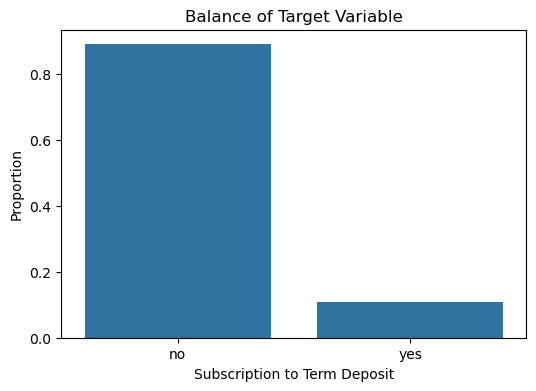

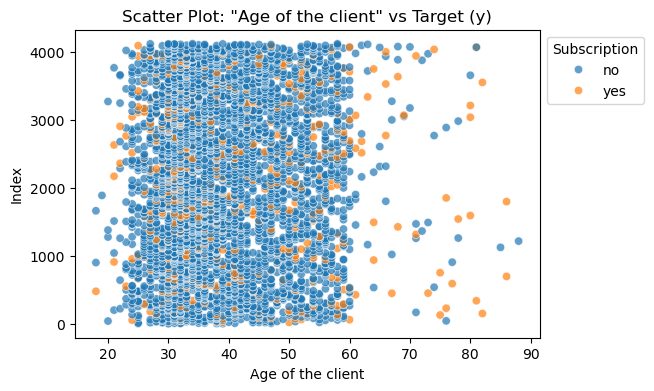

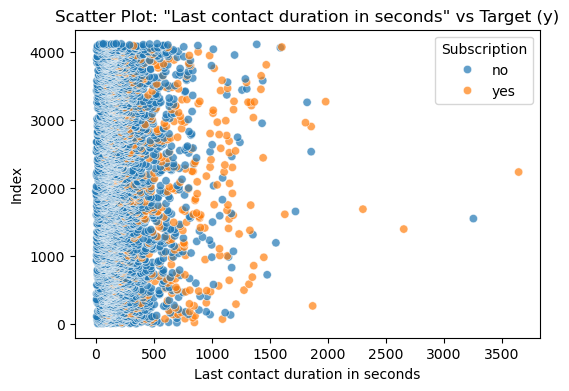

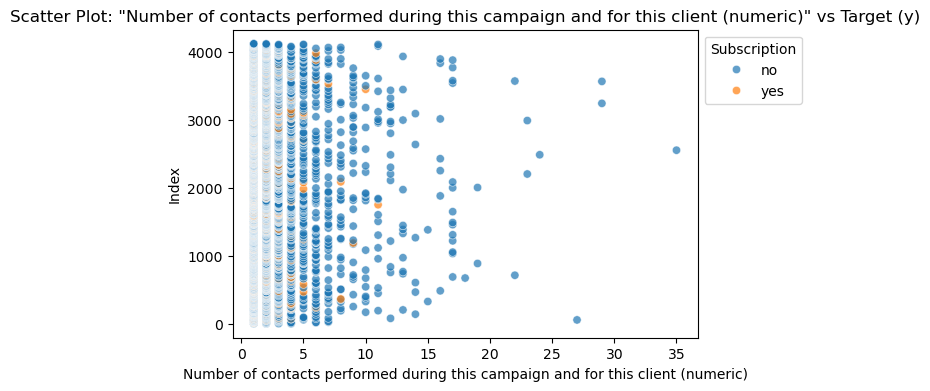

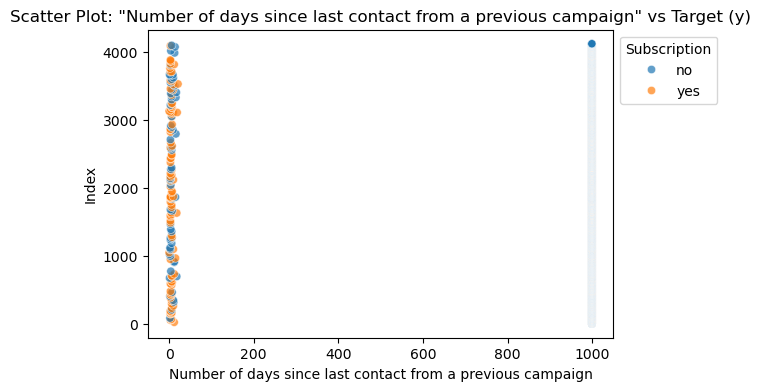

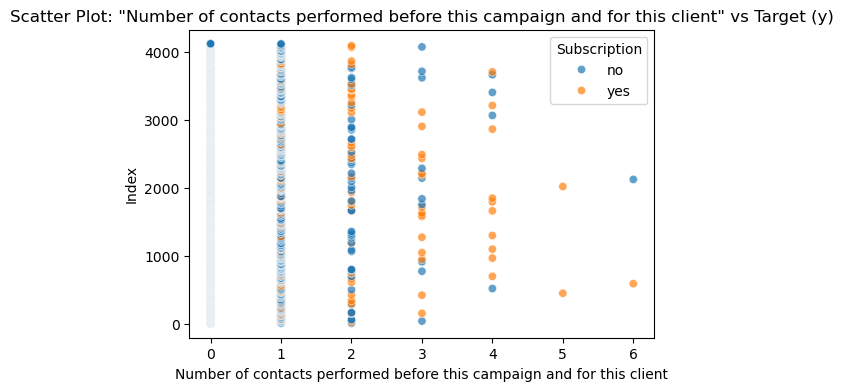

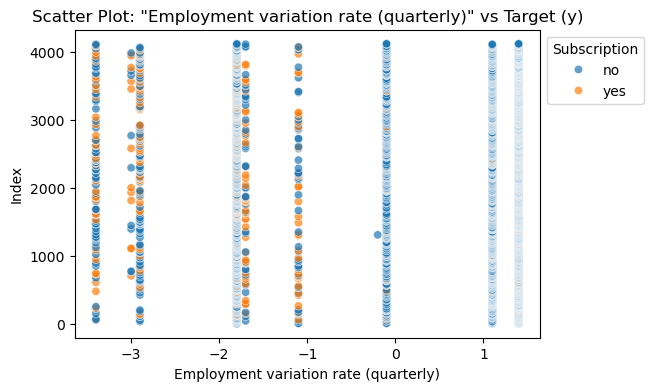

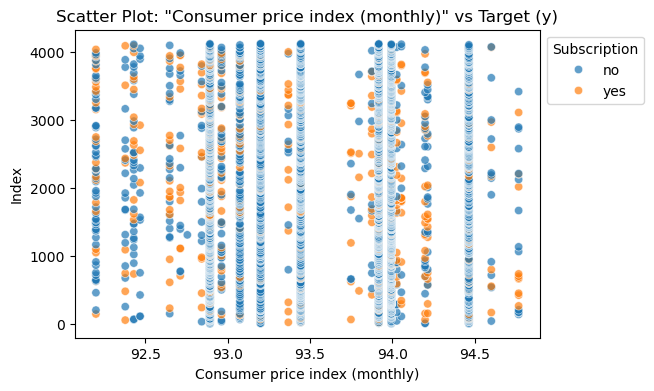

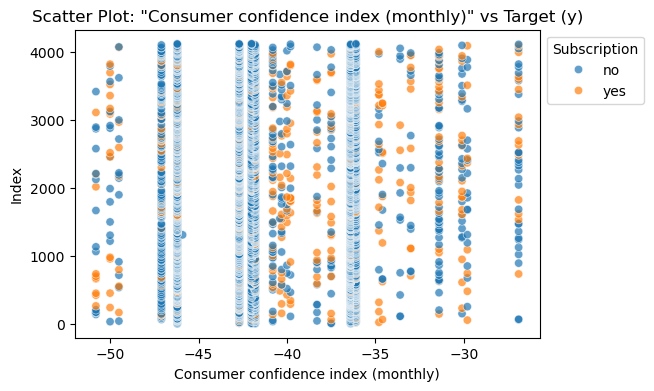

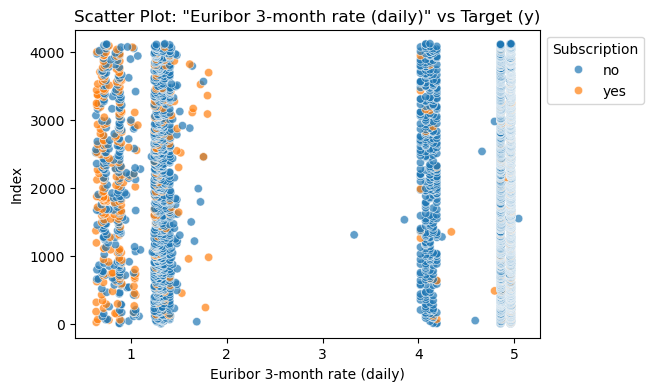

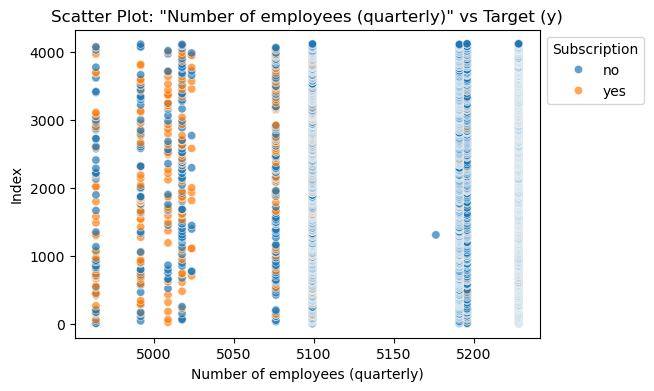

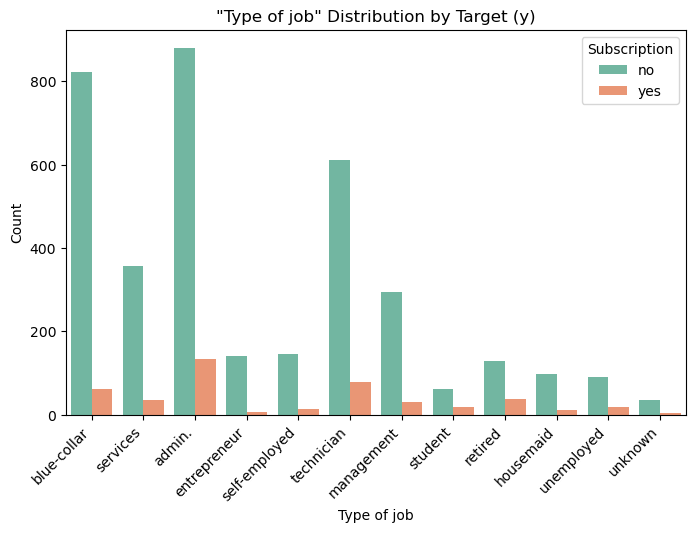

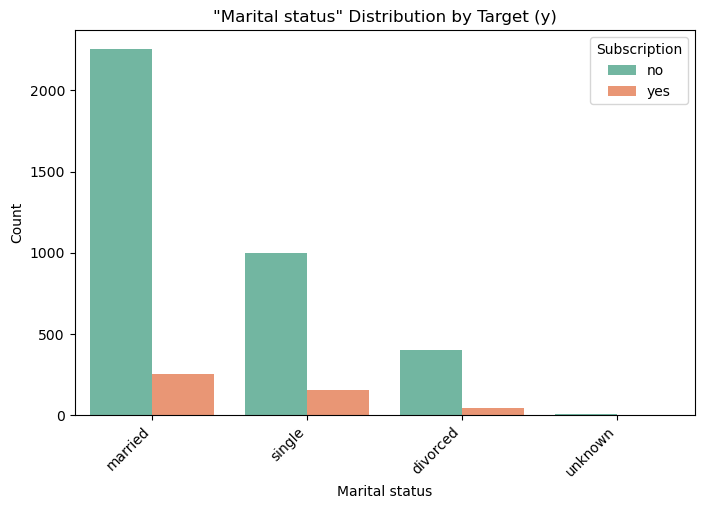

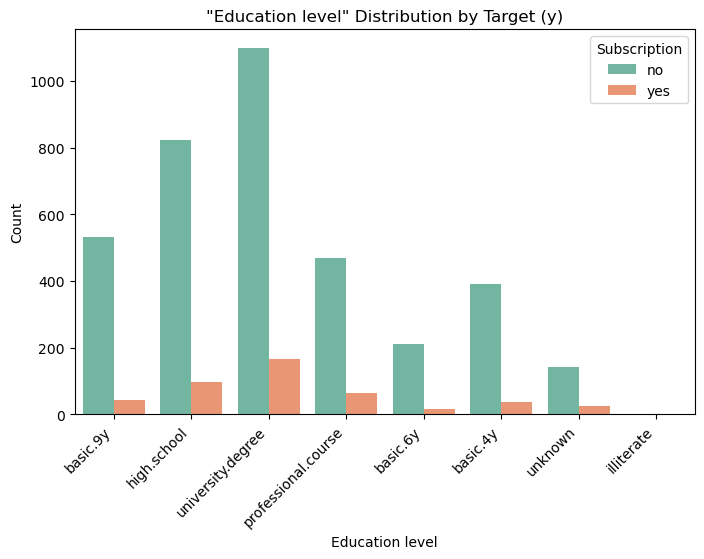

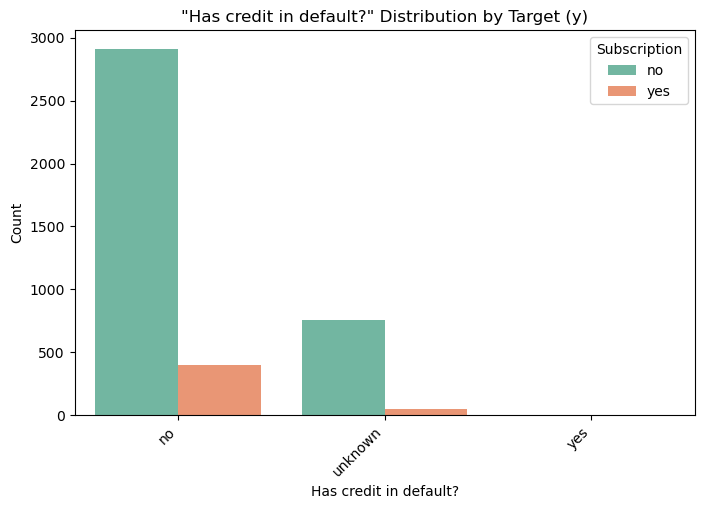

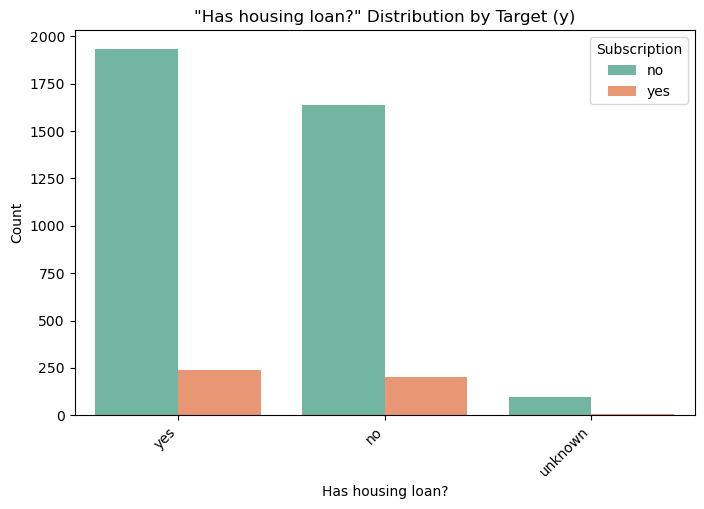

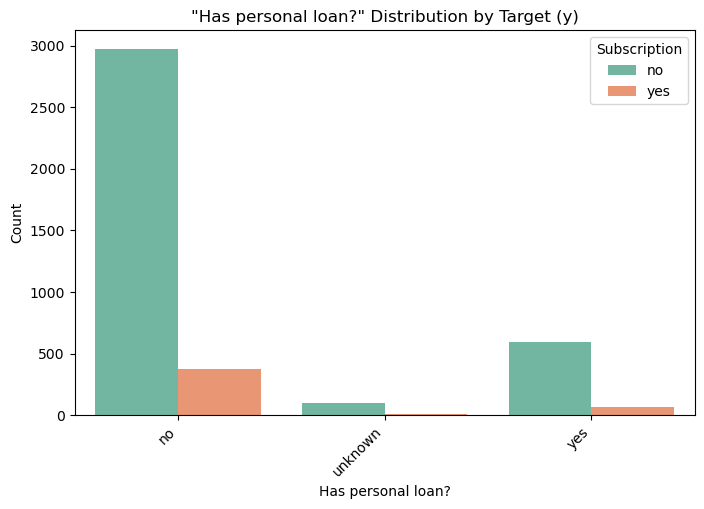

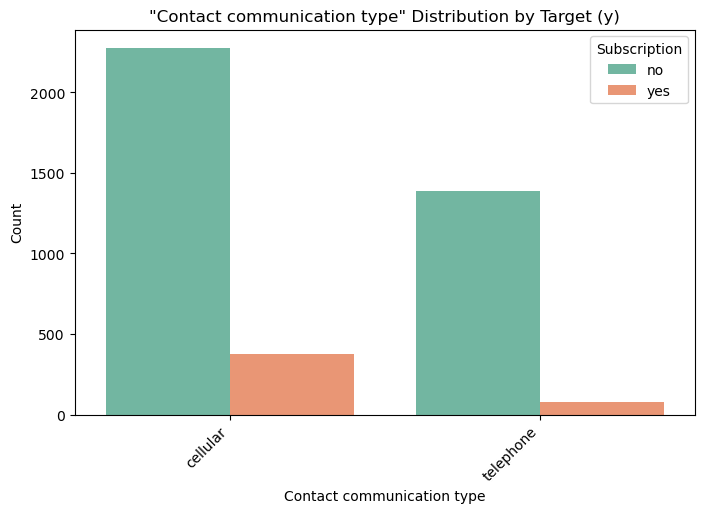

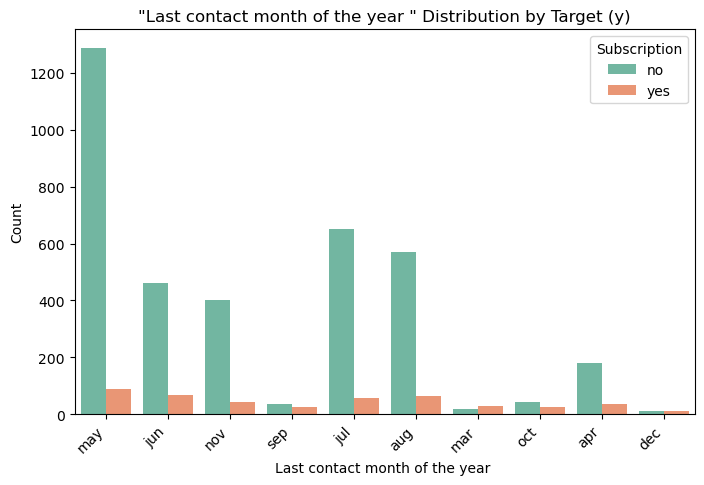

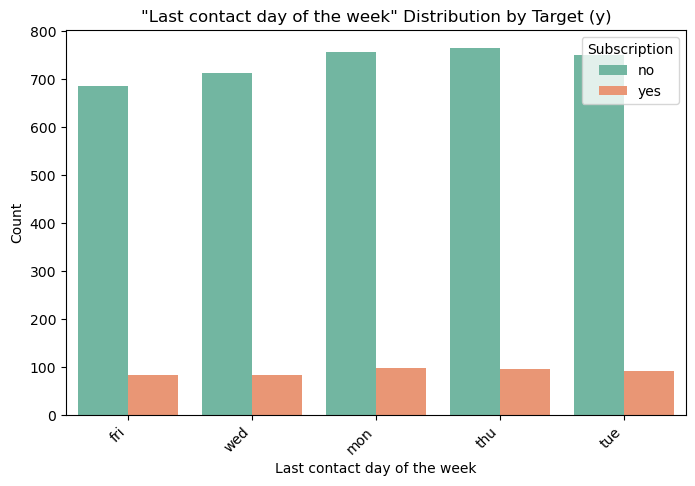

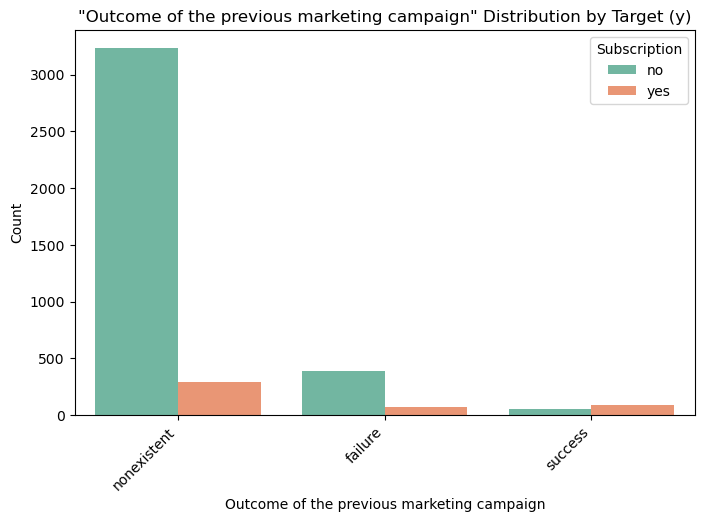

In [60]:
## Deep dive into data, understand the data distribution and relationships

import matplotlib.pyplot as plt
import seaborn as sns

# Split the features into numerical and categorical
numerical_features = ['age', 'duration', 'campaign', 'pdays', 'previous', 
                      'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 
                        'loan', 'contact', 'month', 'day_of_week', 'poutcome']

feature_descriptions = {
    'age': 'Age of the client',
    'job': 'Type of job',
    'marital': 'Marital status',
    'education': 'Education level',
    'default': 'Has credit in default?',
    'housing': 'Has housing loan?',
    'loan': 'Has personal loan?',
    'contact': 'Contact communication type',
    'month': 'Last contact month of the year ',
    'day_of_week': 'Last contact day of the week',
    'duration': 'Last contact duration in seconds',
    'campaign': 'Number of contacts performed during this campaign and for this client (numeric)',
    'pdays': 'Number of days since last contact from a previous campaign',
    'previous': 'Number of contacts performed before this campaign and for this client',
    'poutcome': 'Outcome of the previous marketing campaign',
    'emp.var.rate': 'Employment variation rate (quarterly)',
    'cons.price.idx': 'Consumer price index (monthly)',
    'cons.conf.idx': 'Consumer confidence index (monthly)',
    'euribor3m': 'Euribor 3-month rate (daily)',
    'nr.employed': 'Number of employees (quarterly)',
    'y': 'Has the client subscribed to a term deposit?'
}

# Analyze the balance of the target variable
target_balance = bank_df['y'].value_counts(normalize=True)
print("Balance of the target variable:\n", target_balance)

# Plot the balance of the target variable
plt.figure(figsize=(6, 4))
sns.barplot(x=target_balance.index, y=target_balance.values)
plt.title('Balance of Target Variable')
plt.xlabel('Subscription to Term Deposit')
plt.ylabel('Proportion')
plt.show()

# Plot numerical features against the target
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=bank_df[feature], y=bank_df.index, hue=bank_df['y'], alpha=0.7)
    plt.title(f'Scatter Plot: "{feature_descriptions[feature]}" vs Target (y)')
    plt.xlabel(feature_descriptions[feature])
    plt.ylabel('Index')
    plt.legend(title='Subscription', bbox_to_anchor=(1, 1))
    plt.show()

# Plot categorical features against the target
for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=bank_df, x=feature, hue='y', palette='Set2')
    plt.title(f'"{feature_descriptions[feature]}" Distribution by Target (y)')
    plt.xlabel(feature_descriptions[feature])
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Subscription')
    plt.show()













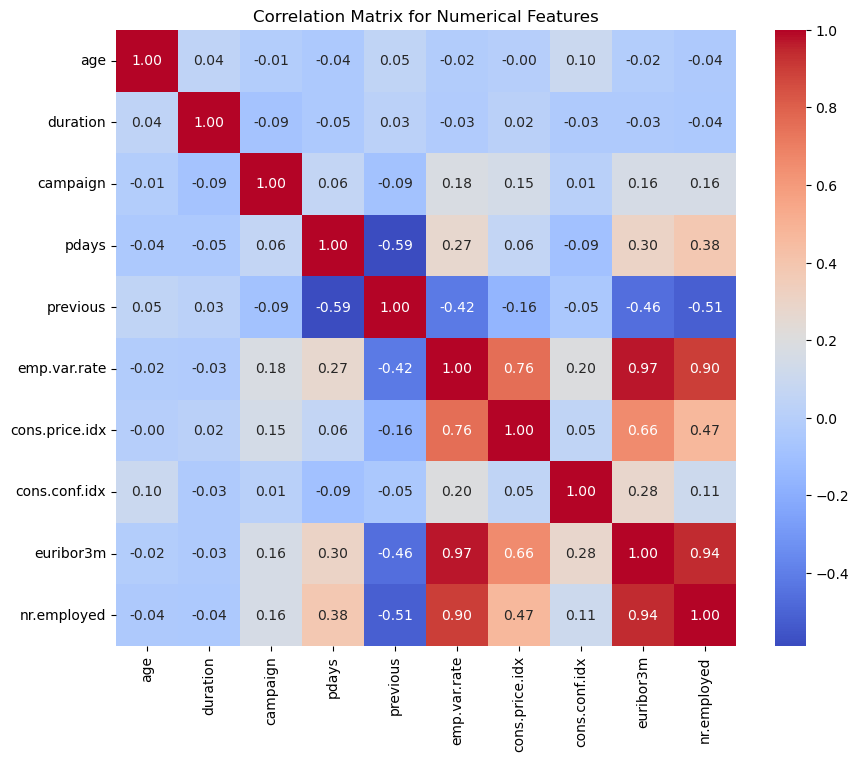

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,0.041299,-0.014169,-0.043425,0.050931,-0.019192,-0.000482,0.098135,-0.015033,-0.041936
duration,0.041299,1.000000,-0.085348,-0.046998,0.025724,-0.028848,0.016672,-0.034745,-0.032329,-0.044218
campaign,-0.014169,-0.085348,1.000000,0.058742,-0.091490,0.176079,0.145021,0.007882,0.159435,0.161037
pdays,-0.043425,-0.046998,0.058742,1.000000,-0.587941,0.270684,0.058472,-0.092090,0.301478,0.381983
previous,0.050931,0.025724,-0.091490,-0.587941,1.000000,-0.415238,-0.164922,-0.051420,-0.458851,-0.514853
emp.var.rate,-0.019192,-0.028848,0.176079,0.270684,-0.415238,1.000000,0.755155,0.195022,0.970308,0.897173
cons.price.idx,-0.000482,0.016672,0.145021,0.058472,-0.164922,0.755155,1.000000,0.045835,0.657159,0.472560
cons.conf.idx,0.098135,-0.034745,0.007882,-0.092090,-0.051420,0.195022,0.045835,1.000000,0.276595,0.107054
euribor3m,-0.015033,-0.032329,0.159435,0.301478,-0.458851,0.970308,0.657159,0.276595,1.000000,0.942589
nr.employed,-0.041936,-0.044218,0.161037,0.381983,-0.514853,0.897173,0.472560,0.107054,0.942589,1.000000


In [62]:
# Calculate correlations for numerical features
correlation_matrix = bank_df[numerical_features].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Matrix for Numerical Features")
plt.show()

correlation_matrix

## Data Preparation

In [68]:
# Make a copy of the dataset for preprocessing
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Load the provided dataset
file_path = 'data/bank-additional/bank-additional.csv'
data = pd.read_csv(file_path, delimiter=';')  # The file appears to use ';' as a delimiter

# Split the features into numerical and categorical
numerical_features = ['age', 'duration', 'campaign', 'pdays', 'previous',
                      'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
categorical_features = ['job', 'marital', 'education', 'default', 'housing',
                        'loan', 'contact', 'month', 'day_of_week', 'poutcome']

# Define categorical and numerical features
numerical_features = ['age', 'duration', 'campaign', 'pdays', 'previous', 
                      'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 
                        'loan', 'contact', 'month', 'day_of_week', 'poutcome']

# Split categorical features into low and high cardinality
low_cardinality_categoricals = [col for col in categorical_features if data[col].nunique() <= 4]
high_cardinality_categoricals = [col for col in categorical_features if col not in low_cardinality_categoricals]

# Initialize encoders and scaler
one_hot_encoder = OneHotEncoder(drop='if_binary', sparse_output=False)
label_encoder = LabelEncoder()
scaler = StandardScaler()

# OneHotEncode low cardinality categorical features
low_card_encoded = pd.DataFrame(one_hot_encoder.fit_transform(data[low_cardinality_categoricals]),
                                columns=one_hot_encoder.get_feature_names_out(low_cardinality_categoricals),
                                index=data.index)

# LabelEncode high cardinality categorical features
high_card_encoded = data[high_cardinality_categoricals].apply(label_encoder.fit_transform)

# Scale numerical features
scaled_numerical = pd.DataFrame(scaler.fit_transform(data[numerical_features]),
                                columns=numerical_features, index=data.index)

# Combine all preprocessed features with the target variable
preprocessed_data = pd.concat([scaled_numerical, low_card_encoded, high_card_encoded, data['y']], axis=1)

# Display the first few rows of the preprocessed dataset
preprocessed_data.head()


# Train-test split
# Splitting the data into training and test sets
X = preprocessed_data.drop(columns=['y'])
y = preprocessed_data['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Save the training and test data to CSV files
X_train.to_csv('data/X_train.csv', index=False)
X_test.to_csv('data/X_test.csv', index=False)
y_train.to_csv('data/y_train.csv', index=False)
y_test.to_csv('data/y_test.csv', index=False)

# Display the preprocessed data overview
preprocessed_data.info(), X_train.shape, X_test.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   4119 non-null   float64
 1   duration              4119 non-null   float64
 2   campaign              4119 non-null   float64
 3   pdays                 4119 non-null   float64
 4   previous              4119 non-null   float64
 5   emp.var.rate          4119 non-null   float64
 6   cons.price.idx        4119 non-null   float64
 7   cons.conf.idx         4119 non-null   float64
 8   euribor3m             4119 non-null   float64
 9   nr.employed           4119 non-null   float64
 10  marital_divorced      4119 non-null   float64
 11  marital_married       4119 non-null   float64
 12  marital_single        4119 non-null   float64
 13  marital_unknown       4119 non-null   float64
 14  default_no            4119 non-null   float64
 15  default_unknown      

(None, (2883, 31), (1236, 31))

In [72]:
preprocessed_data.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,loan_yes,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success,job,education,month,day_of_week,y
0,-0.980752,0.903952,-0.209228,0.201031,-0.351356,-1.206054,-1.185448,-1.240939,-1.331707,-0.914779,...,0.0,0.0,0.0,1.0,0.0,1,2,6,0,no
1,-0.107991,0.350300,0.569634,0.201031,-0.351356,0.649441,0.715193,0.892269,0.711698,0.332862,...,0.0,1.0,0.0,1.0,0.0,7,3,6,0,no
2,-1.465619,-0.116966,-0.598660,0.201031,-0.351356,0.841389,1.528273,-0.283172,0.773427,0.836535,...,0.0,1.0,0.0,1.0,0.0,7,3,4,4,no
3,-0.204965,-0.941553,0.180203,0.201031,-0.351356,0.841389,1.528273,-0.283172,0.771697,0.836535,...,0.0,1.0,0.0,1.0,0.0,7,2,4,0,no
4,0.667795,-0.780563,-0.598660,0.201031,-0.351356,-0.118350,-0.655478,-0.326707,0.328632,0.398028,...,0.0,0.0,0.0,1.0,0.0,0,6,7,1,no


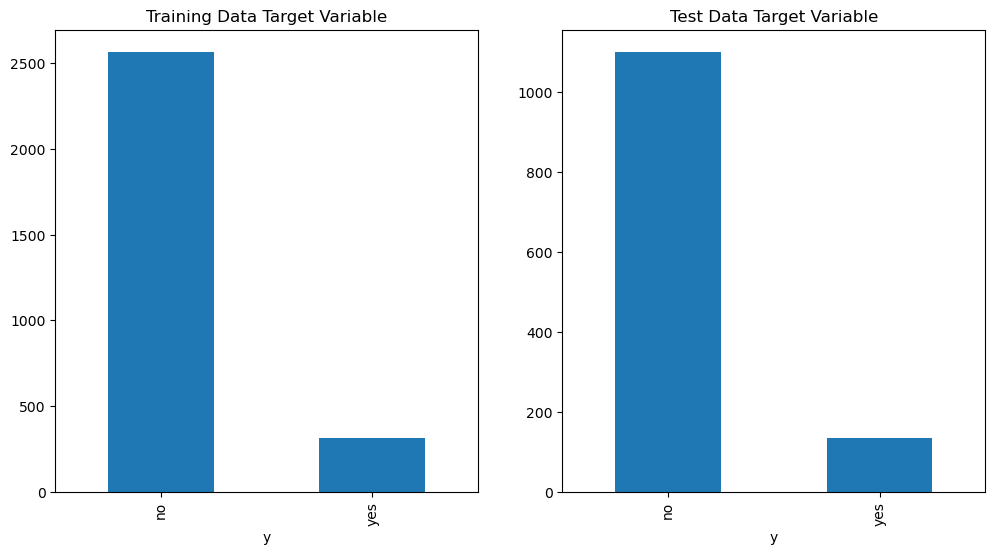

In [74]:
# plot the bar chart of the target variable in test and training data
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
y_train.value_counts().plot(kind='bar', ax=ax[0], title='Training Data Target Variable')
y_test.value_counts().plot(kind='bar', ax=ax[1], title='Test Data Target Variable')
plt.show()

## Data Modelling

In [79]:
# Load the training and test data from the files created during the last step
import pandas as pd

# File paths
X_train_path = 'data/X_train.csv'
X_test_path = 'data/X_test.csv'
y_train_path = 'data/y_train.csv'
y_test_path = 'data/y_test.csv'

# Load the data
X_train = pd.read_csv(X_train_path)
X_test = pd.read_csv(X_test_path)
y_train = pd.read_csv(y_train_path)
y_test = pd.read_csv(y_test_path)

# Display loaded data shapes
print("Training features shape:", X_train.shape)
print("Test features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Test target shape:", y_test.shape)

Training features shape: (2883, 31)
Test features shape: (1236, 31)
Training target shape: (2883, 1)
Test target shape: (1236, 1)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model: KNN
              precision    recall  f1-score   support

          no       0.91      0.97      0.94      1101
         yes       0.51      0.23      0.32       135

    accuracy                           0.89      1236
   macro avg       0.71      0.60      0.63      1236
weighted avg       0.87      0.89      0.87      1236

AUC-ROC: 0.81


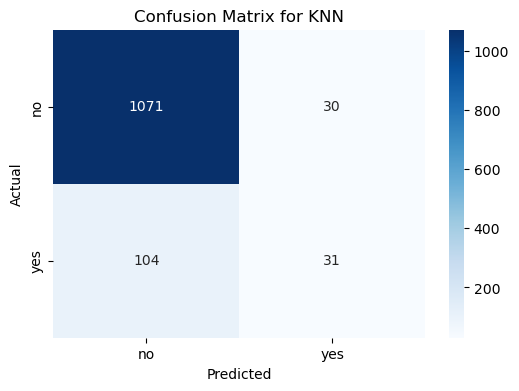

Model: Decision Tree
              precision    recall  f1-score   support

          no       0.94      0.93      0.93      1101
         yes       0.47      0.51      0.49       135

    accuracy                           0.88      1236
   macro avg       0.71      0.72      0.71      1236
weighted avg       0.89      0.88      0.89      1236

AUC-ROC: 0.72


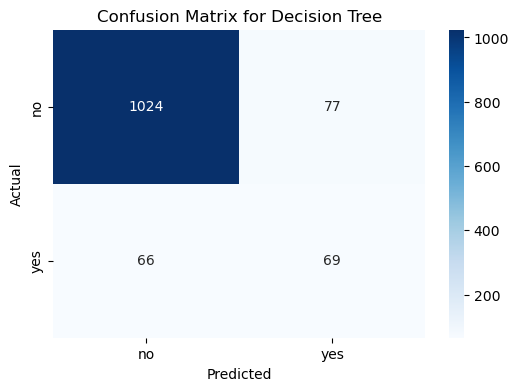

Model: Logistic Regression
              precision    recall  f1-score   support

          no       0.93      0.97      0.95      1101
         yes       0.65      0.38      0.48       135

    accuracy                           0.91      1236
   macro avg       0.79      0.68      0.71      1236
weighted avg       0.90      0.91      0.90      1236

AUC-ROC: 0.92


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


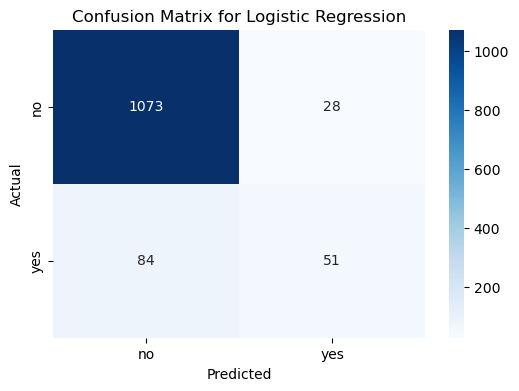

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model: SVM
              precision    recall  f1-score   support

          no       0.92      0.98      0.95      1101
         yes       0.68      0.27      0.38       135

    accuracy                           0.91      1236
   macro avg       0.80      0.63      0.67      1236
weighted avg       0.89      0.91      0.89      1236

AUC-ROC: 0.91


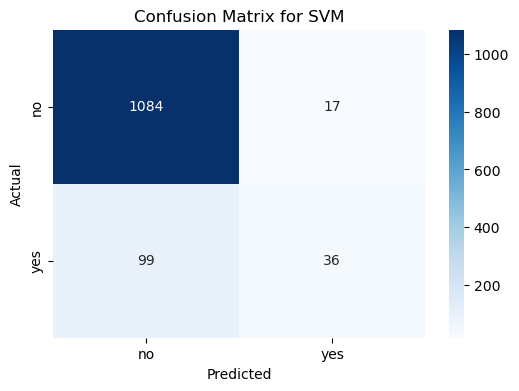


KNN:
Accuracy: 0.89
Precision for 'no': 0.91
Precision for 'yes': 0.51
Recall for 'no': 0.97
Recall for 'yes': 0.23
F1-Score for 'no': 0.94
F1-Score for 'yes': 0.32
AUC-ROC: 0.81

Decision Tree:
Accuracy: 0.88
Precision for 'no': 0.94
Precision for 'yes': 0.47
Recall for 'no': 0.93
Recall for 'yes': 0.51
F1-Score for 'no': 0.93
F1-Score for 'yes': 0.49
AUC-ROC: 0.72

Logistic Regression:
Accuracy: 0.91
Precision for 'no': 0.93
Precision for 'yes': 0.65
Recall for 'no': 0.97
Recall for 'yes': 0.38
F1-Score for 'no': 0.95
F1-Score for 'yes': 0.48
AUC-ROC: 0.92

SVM:
Accuracy: 0.91
Precision for 'no': 0.92
Precision for 'yes': 0.68
Recall for 'no': 0.98
Recall for 'yes': 0.27
F1-Score for 'no': 0.95
F1-Score for 'yes': 0.38
AUC-ROC: 0.91


In [81]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define models
models = {
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "SVM": SVC(probability=True, random_state=42)
}

# Train and evaluate models
results = {}
test_mapped = y_test['y'].map({"no": 0, "yes": 1})

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on test data
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    # Metrics
    print(f"Model: {name}")
    print(classification_report(y_test, y_pred, target_names=["no", "yes"]))
    if y_proba is not None:
        roc_auc = roc_auc_score(test_mapped, y_proba)
        print(f"AUC-ROC: {roc_auc:.2f}")
    
    # Store results
    results[name] = {
        "classification_report": classification_report(y_test, y_pred, target_names=["no", "yes"], output_dict=True),
        "roc_auc": roc_auc if y_proba is not None else None
    }
    
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=["no", "yes"])
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["no", "yes"], yticklabels=["no", "yes"])
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Compare models
for name, result in results.items():
    print(f"\n{name}:")
    print(f"Accuracy: {result['classification_report']['accuracy']:.2f}")
    print(f"Precision for 'no': {result['classification_report']['no']['precision']:.2f}")
    print(f"Precision for 'yes': {result['classification_report']['yes']['precision']:.2f}")
    print(f"Recall for 'no': {result['classification_report']['no']['recall']:.2f}")
    print(f"Recall for 'yes': {result['classification_report']['yes']['recall']:.2f}")
    print(f"F1-Score for 'no': {result['classification_report']['no']['f1-score']:.2f}")
    print(f"F1-Score for 'yes': {result['classification_report']['yes']['f1-score']:.2f}")
    if result["roc_auc"] is not None:
       print(f"AUC-ROC: {result['roc_auc']:.2f}")

### Hyper-parameter optimization

In [84]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grids for each model
param_grids = {
    "KNN": {
        "n_neighbors": [3, 5, 7, 9],
        "weights": ["uniform", "distance"]
    },
    "Decision Tree": {
        "max_depth": [None, 10, 20, 30],
        "min_samples_split": [2, 5, 10]
    },
    "Logistic Regression": {
        "C": [0.01, 0.1, 1, 10, 100],
        "solver": ["lbfgs", "liblinear"]
    },
    "SVM": {
        "C": [0.1, 1, 10, 100],
        "kernel": ["linear", "rbf", "poly"]
    }
}

# Perform hyperparameter optimization for each model
optimized_results = {}
for name, model in models.items():
    print(f"Optimizing {name}...")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[name], scoring='roc_auc', cv=5, verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Store the best model and its performance
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    y_pred = best_model.predict(X_test)
    y_proba = best_model.predict_proba(X_test)[:, 1] if hasattr(best_model, "predict_proba") else None
    auc_roc = roc_auc_score(test_mapped, y_proba) if y_proba is not None else None
    
    print(f"Best Parameters for {name}: {best_params}")
    print(f"AUC-ROC for Optimized {name}: {auc_roc:.2f}" if auc_roc else f"AUC-ROC not applicable for {name}")
    
    # Save results
    optimized_results[name] = {
        "best_model": best_model,
        "best_params": best_params,
        "auc_roc": auc_roc,
        "classification_report": classification_report(y_test, y_pred, target_names=["no", "yes"], output_dict=True),
    }

Optimizing KNN...
Fitting 5 folds for each of 8 candidates, totalling 40 fits


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

Best Parameters for KNN: {'n_neighbors': 9, 'weights': 'distance'}
AUC-ROC for Optimized KNN: 0.83
Optimizing Decision Tree...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters for Decision Tree: {'max_depth': 10, 'min_samples_split': 10}
AUC-ROC for Optimized Decision Tree: 0.81
Optimizing Logistic Regression...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters for Logistic Regression: {'C': 1, 'solver': 'liblinear'}
AUC-ROC for Optimized Logistic Regression: 0.92
Optimizing SVM...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

Best Parameters for SVM: {'C': 0.1, 'kernel': 'linear'}
AUC-ROC for Optimized SVM: 0.92


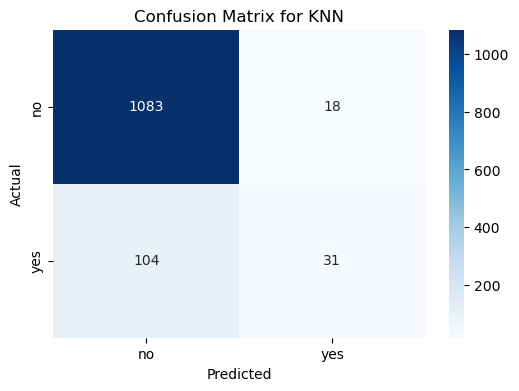

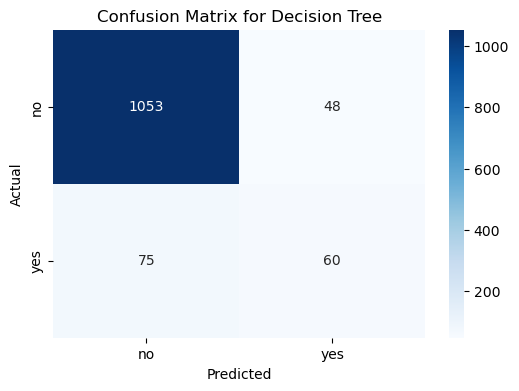

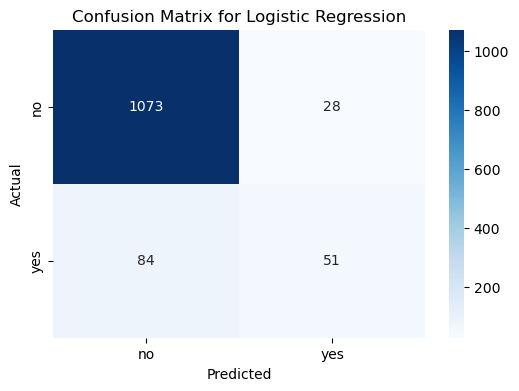

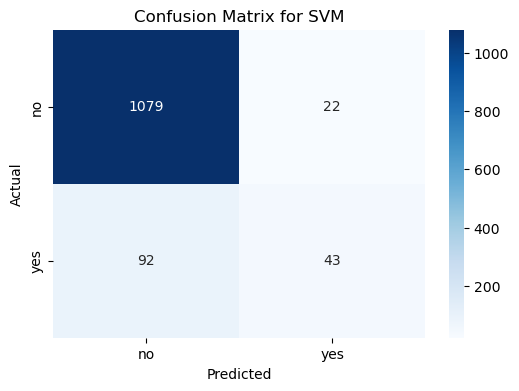


KNN - Best Parameters: {'n_neighbors': 9, 'weights': 'distance'}, AUC-ROC: 0.83
Accuracy: 0.90
Precision for 'no': 0.91
Precision for 'yes': 0.63
Recall for 'no': 0.98
Recall for 'yes': 0.23
F1-Score for 'no': 0.95
F1-Score for 'yes': 0.34
Confusion Matrix:
[[1083   18]
 [ 104   31]]

Decision Tree - Best Parameters: {'max_depth': 10, 'min_samples_split': 10}, AUC-ROC: 0.81
Accuracy: 0.90
Precision for 'no': 0.93
Precision for 'yes': 0.56
Recall for 'no': 0.96
Recall for 'yes': 0.44
F1-Score for 'no': 0.94
F1-Score for 'yes': 0.49
Confusion Matrix:
[[1053   48]
 [  75   60]]

Logistic Regression - Best Parameters: {'C': 1, 'solver': 'liblinear'}, AUC-ROC: 0.92
Accuracy: 0.91
Precision for 'no': 0.93
Precision for 'yes': 0.65
Recall for 'no': 0.97
Recall for 'yes': 0.38
F1-Score for 'no': 0.95
F1-Score for 'yes': 0.48
Confusion Matrix:
[[1073   28]
 [  84   51]]

SVM - Best Parameters: {'C': 0.1, 'kernel': 'linear'}, AUC-ROC: 0.92
Accuracy: 0.91
Precision for 'no': 0.92
Precision for '

In [86]:
# lets get the confusion matrix for the each best model
for name, result in optimized_results.items():
    best_model = result["best_model"]
    y_pred = best_model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, labels=["no", "yes"])
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["no", "yes"], yticklabels=["no", "yes"])
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()



# Display summary of best results for all models
for name, result in optimized_results.items():
    print(f"\n{name} - Best Parameters: {result['best_params']}, AUC-ROC: {result['auc_roc']:.2f}" if result["auc_roc"] else "")
    classification_report = result['classification_report']
    print(f"Accuracy: {classification_report['accuracy']:.2f}")
    print(f"Precision for 'no': {classification_report['no']['precision']:.2f}")
    print(f"Precision for 'yes': {classification_report['yes']['precision']:.2f}")
    print(f"Recall for 'no': {classification_report['no']['recall']:.2f}")
    print(f"Recall for 'yes': {classification_report['yes']['recall']:.2f}")
    print(f"F1-Score for 'no': {classification_report['no']['f1-score']:.2f}")
    print(f"F1-Score for 'yes': {classification_report['yes']['f1-score']:.2f}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, result['best_model'].predict(X_test), labels=['no', 'yes'])}")

In [88]:
# Lets print the results in a tabular format
results_df = pd.DataFrame(columns=["Model", "Accuracy", "Precision (no)", "Precision (yes)", "Recall (no)", "Recall (yes)", "F1-Score (no)", "F1-Score (yes)", "AUC-ROC"])
for name, result in optimized_results.items():
    name = f"{name}({result['best_params']})"
    results_df.loc[len(results_df)] = [name, result['classification_report']['accuracy'], result['classification_report']['no']['precision'], result['classification_report']['yes']['precision'], result['classification_report']['no']['recall'], result['classification_report']['yes']['recall'], result['classification_report']['no']['f1-score'], result['classification_report']['yes']['f1-score'], result['auc_roc']]
for name, result in results.items():
    results_df.loc[len(results_df)] = [name, result['classification_report']['accuracy'], result['classification_report']['no']['precision'], result['classification_report']['yes']['precision'], result['classification_report']['no']['recall'], result['classification_report']['yes']['recall'], result['classification_report']['no']['f1-score'], result['classification_report']['yes']['f1-score'], result['roc_auc']]

results_df.set_index("Model", inplace=True)
results_df

,Accuracy,Precision (no),Precision (yes),Recall (no),Recall (yes),F1-Score (no),F1-Score (yes),AUC-ROC
Model,,,,,,,,
"KNN({'n_neighbors': 9, 'weights': 'distance'})",0.901294,0.912384,0.632653,0.983651,0.229630,0.946678,0.336957,0.831480
"Decision Tree({'max_depth': 10, 'min_samples_split': 10})",0.900485,0.933511,0.555556,0.956403,0.444444,0.944818,0.493827,0.812053
"Logistic Regression({'C': 1, 'solver': 'liblinear'})",0.909385,0.927398,0.645570,0.974569,0.377778,0.950399,0.476636,0.923760
"SVM({'C': 0.1, 'kernel': 'linear'})",0.907767,0.921435,0.661538,0.980018,0.318519,0.949824,0.430000,0.921849
KNN,0.891586,0.911489,0.508197,0.972752,0.229630,0.941125,0.316327,0.805540
Decision Tree,0.884304,0.939450,0.472603,0.930064,0.511111,0.934733,0.491103,0.720587
Logistic Regression,0.909385,0.927398,0.645570,0.974569,0.377778,0.950399,0.476636,0.924096
SVM,0.906149,0.916314,0.679245,0.984559,0.266667,0.949212,0.382979,0.907431


## Conclusion 

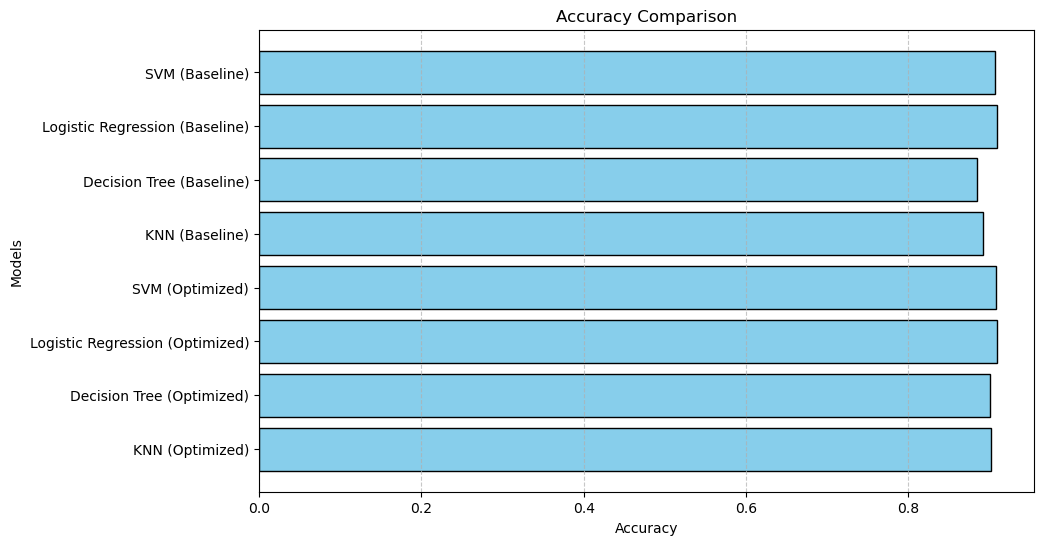

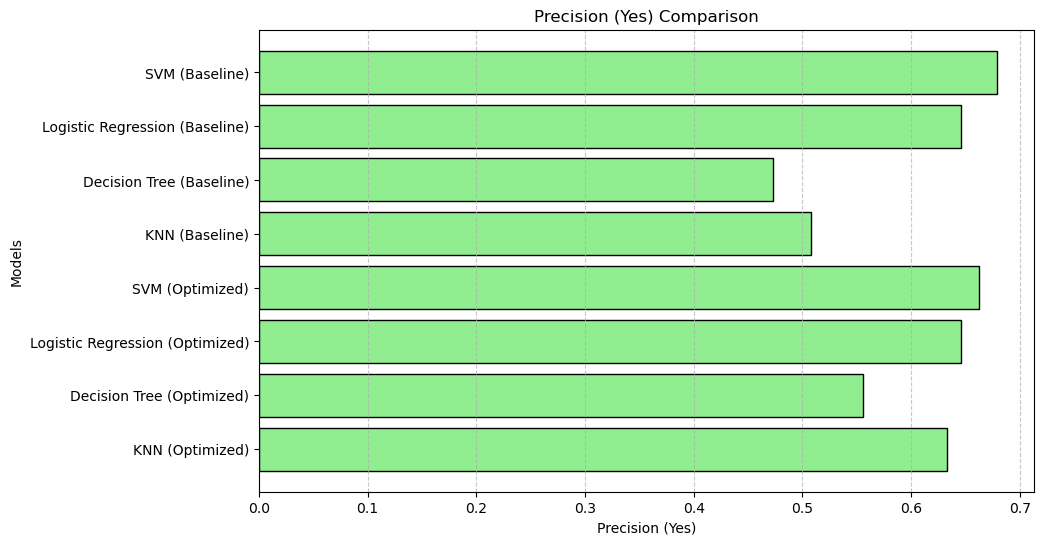

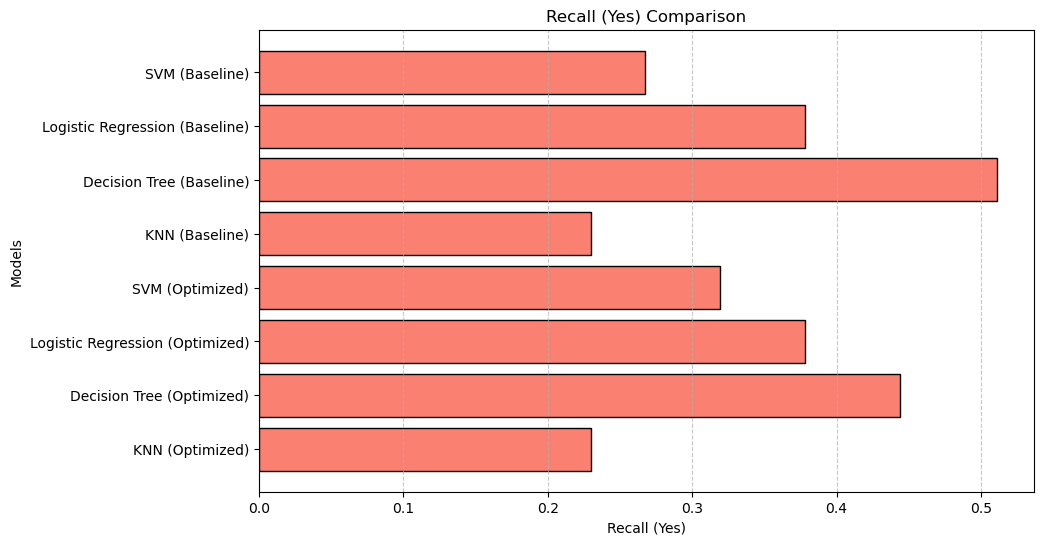

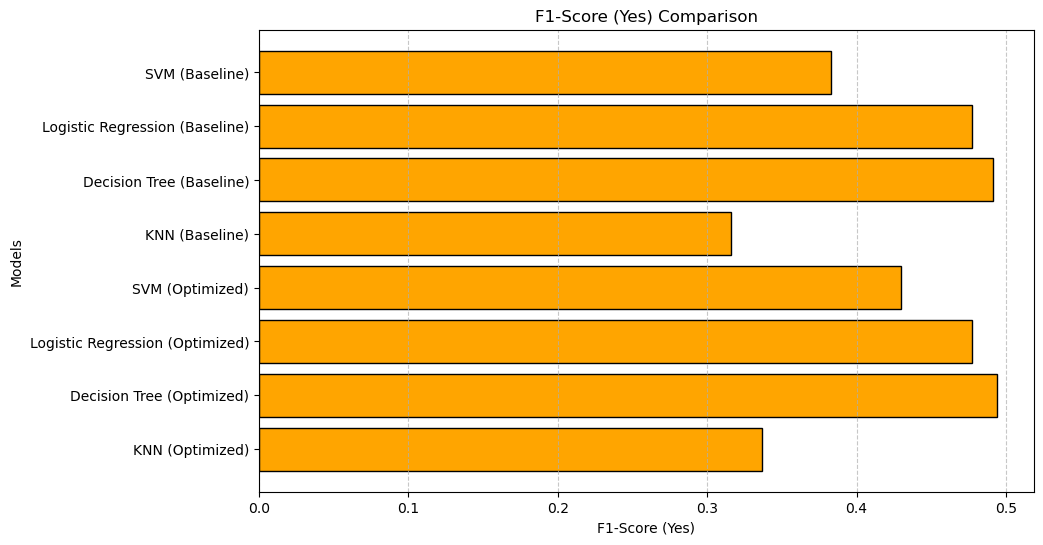

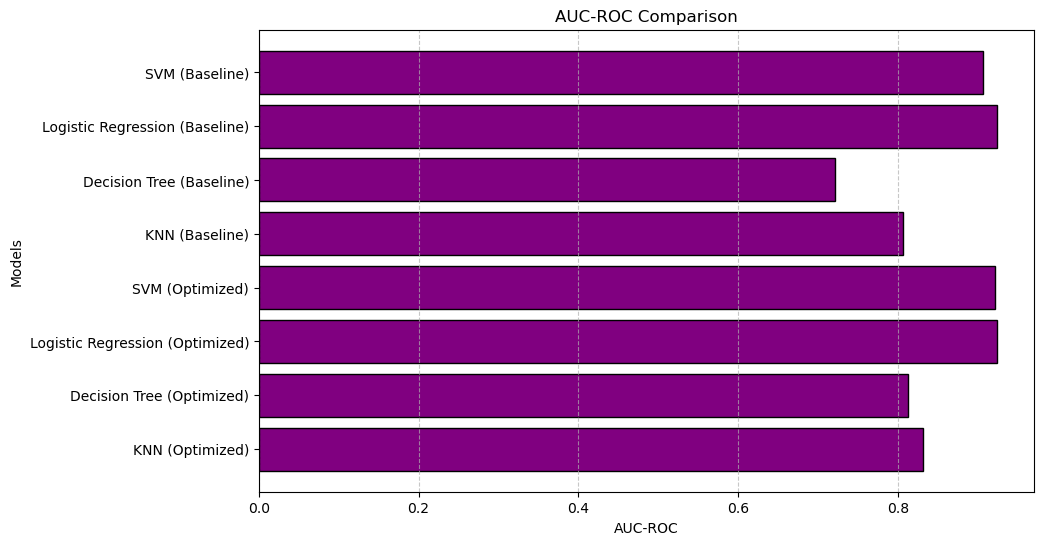

In [91]:
import matplotlib.pyplot as plt
import numpy as np

# Data for visualization
models = [
    "KNN (Optimized)", "Decision Tree (Optimized)", "Logistic Regression (Optimized)", "SVM (Optimized)",
    "KNN (Baseline)", "Decision Tree (Baseline)", "Logistic Regression (Baseline)", "SVM (Baseline)"
]
accuracy = [0.901, 0.900, 0.909, 0.908, 0.892, 0.884, 0.909, 0.906]
precision_yes = [0.633, 0.556, 0.646, 0.662, 0.508, 0.473, 0.646, 0.679]
recall_yes = [0.230, 0.444, 0.378, 0.319, 0.230, 0.511, 0.378, 0.267]
f1_score_yes = [0.337, 0.494, 0.477, 0.430, 0.316, 0.491, 0.477, 0.383]
auc_roc = [0.831, 0.812, 0.924, 0.922, 0.806, 0.721, 0.924, 0.907]

# Visualization: Accuracy Comparison
plt.figure(figsize=(10, 6))
plt.barh(models, accuracy, color='skyblue', edgecolor='black')
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Models')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Visualization: Precision (Yes) Comparison
plt.figure(figsize=(10, 6))
plt.barh(models, precision_yes, color='lightgreen', edgecolor='black')
plt.title('Precision (Yes) Comparison')
plt.xlabel('Precision (Yes)')
plt.ylabel('Models')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Visualization: Recall (Yes) Comparison
plt.figure(figsize=(10, 6))
plt.barh(models, recall_yes, color='salmon', edgecolor='black')
plt.title('Recall (Yes) Comparison')
plt.xlabel('Recall (Yes)')
plt.ylabel('Models')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Visualization: F1-Score (Yes) Comparison
plt.figure(figsize=(10, 6))
plt.barh(models, f1_score_yes, color='orange', edgecolor='black')
plt.title('F1-Score (Yes) Comparison')
plt.xlabel('F1-Score (Yes)')
plt.ylabel('Models')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Visualization: AUC-ROC Comparison
plt.figure(figsize=(10, 6))
plt.barh(models, auc_roc, color='purple', edgecolor='black')
plt.title('AUC-ROC Comparison')
plt.xlabel('AUC-ROC')
plt.ylabel('Models')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()
